2021.08.04 <br>
Machine Learning Seminar <br>
CH05 Tree Algorithm <br>

1. Decision Tree
2. Cross Validate
3. Ensemble Algorithm

<br><br>

<h2> 로지스틱 회귀로 와인 분류하기 </h2>

- 이진 분류 : 레드 와인 OR 화이트 와인

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.info()     # 데이터 프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인
wine.head()     # 처음 5개 샘플 확인
wine['class'].value_counts()
wine.describe() # 열에 대한 간략한 통계 출력 (최소, 최대, 평균값)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


<h3> pitcher:  alcohol / sugar / pH </h3>
- class: 타깃값 0: 레드와인, 1: 화이트와인

In [18]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input,test_input, train_target, test_target = train_test_split(data,target, test_size=0.2, random_state=42,stratify=target) # stratify_target 

print(train_input.shape, test_input.shape)


(5197, 3) (1300, 3)


In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)


data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

- StandardScaler : 훈련 세트 전처리
- 객체를 테스트 세트로 변환

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print(lr.coef_, lr.intercept_) # coef:  알코올 농도와 당도 (높을수록 화이트 와인의 가능성) /  pH (높을수록 레드와인 가능성 )

0.7829517029055224
0.7761538461538462
[[ 0.56730858  1.65325259 -0.71278722]] [1.78577187]


- 로지스틱 회귀 모델 훈련
- 훈련/테스트 세트 점수 모두 낮음 -> 모델의 과소적합 (규제 매개변수 값 변환 고려)

<br><br>

<h1> 결정 트리 (Decision Tree) </h1>

- '이유를 설명하기 쉽다', 스무고개와 같다.
- 데이터를 잘 나눌 수 있는 질문을 추가하여 분류 정확도를 높일 수 있다.
- 사이킷런의 DecisionTreeClassifier 클래스 사용하여 결정 트리 모델 훈련

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트


0.9978833942659227
0.8646153846153846


- 훈련 세트에 대한 점수가 매우 높음(0.998)에 비해 테스트 세트의 성능은 조금 낮음 -> 과대적합(Overfit)

<br>

<h3> 결정 트리 그림 </h3>
- plot_tree()


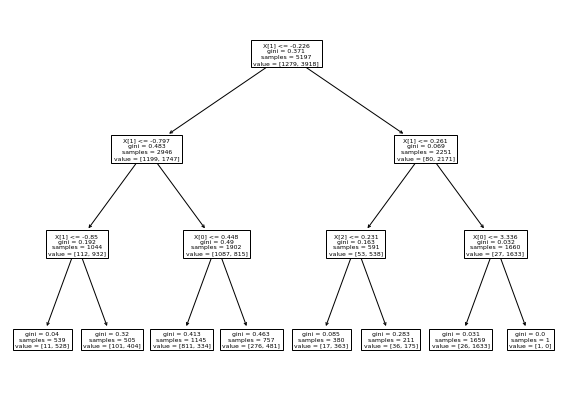

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 루트 노드(root node): 맨위의 노드
- 리프 노드(lear node): 맨 아래 끝에 달린 노드

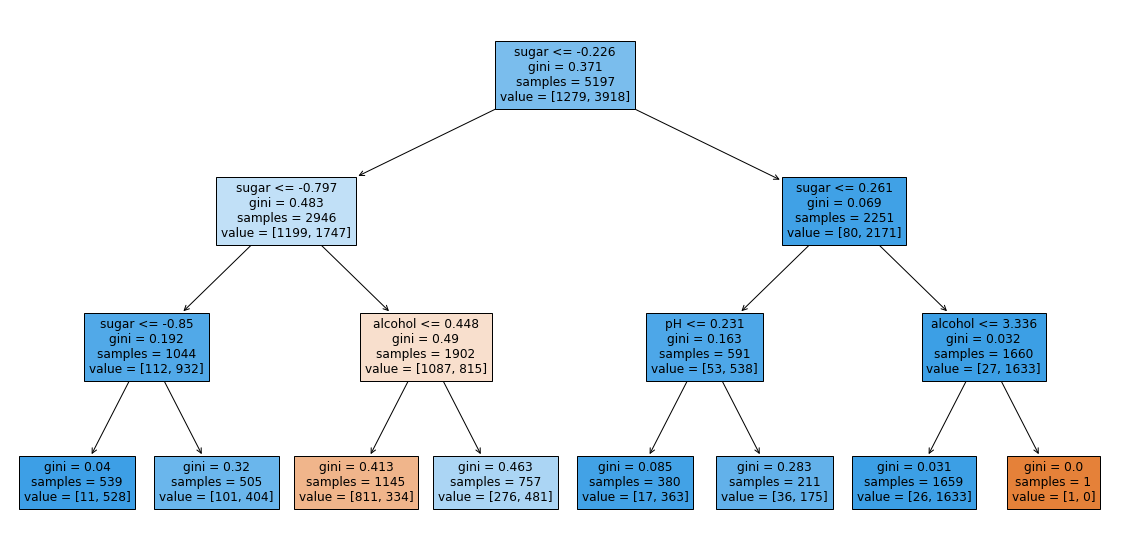

In [14]:
plt.figure(figsize=(20,10))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()


# max_depth: 트리의 깊이를 제한 (루트 노드를 제외한 확장된 노드의 개수)
# filled: 클래스에 맞게 노드의 색을 칠함
# feature_names: 특성의 이름 전달

- max_depth: 트리의 깊이를 제한 (루트 노드를 제외한 확장된 노드의 개수)
- filled: 클래스에 맞게 노드의 색을 칠함
- feature_names: 특성의 이름 전달

<h2> 지니 불순도(Gini impurity) </h2>

- DecisionTreeCrassifier 클래스의 criterion 기본 값이 'gini'이다.
- criterion: 노드에서 데이터를 분할할 기준을 정하는 것

<h2> 정보 이득 (Information Gain) </h2>

- 부모와 자식 노드 사이의 불순도 차이
- criterion='entropy' :: 엔트로피 불순도 (밑이 2인 로그를 사용하여 곱하게 됨)

0.8458726188185491
0.8407692307692308


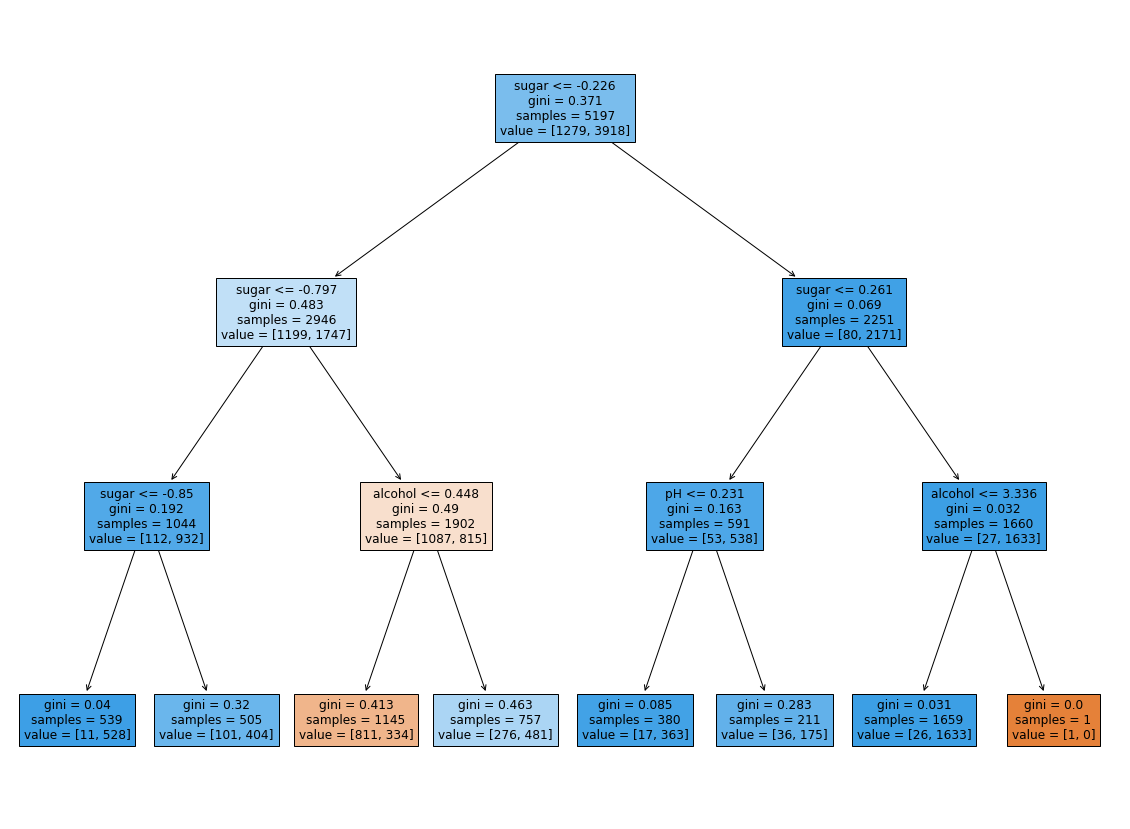

In [22]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier(random_state = 42)
# dt.fit(train_scaled, train_target)
# print(dt.score(train_scaled, train_target)) # 훈련 세트
# print(dt.score(test_scaled, test_target)) # 테스트 세트


# 루트 노드 아래로 최대 3개 노드까지만 성장
# 훈련 세트의 성능은 낮아졌지만, 테스트 세트의 성능은 거의 그대로
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

0.8458726188185491
0.8407692307692308


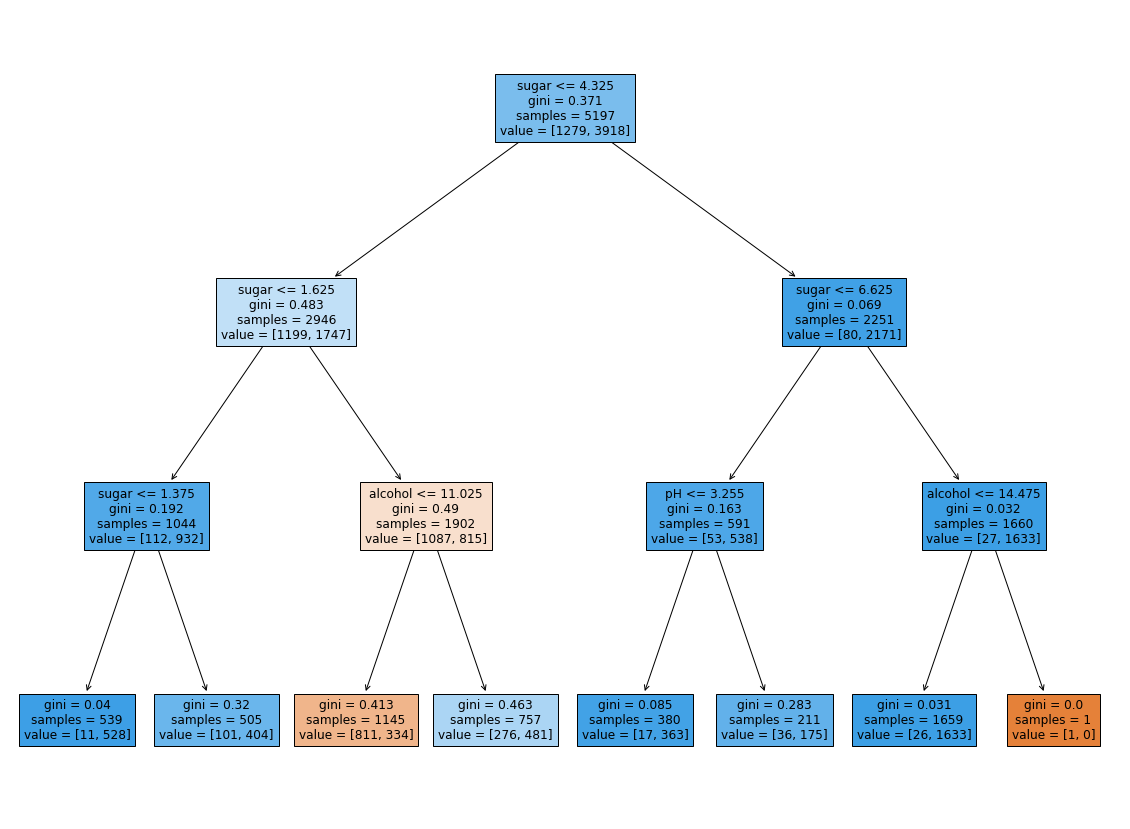

[0.14086835 0.85360568 0.00552597]


In [21]:
# 전처리하기 전의 훈련 세트(train_input)와 테스트 세트(test_input)으로 결정 트리 모델 훈련


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

print(dt.feature_importances_)


<br><br>

<h1> 교차 검증 (Cross Validate) </h1>

- 검증 세트(Validation Set) : 전체 세트 중, 일부를 테스트 세트로, 나머지를 훈련 세트로 만든 후, 훈련 세트 중에서 다시 일부를 떼어 검증 세트로 만듬

In [ ]:
import pandas as pd

# csv 파일 읽기
wine = pd.read_csv('https://bit.ly/wine_csv_data’)

# class 열을 타깃으로 사용, 나머지 열은 특성 배열에 저장
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [27]:
# 훈련 세트와 테스트 세트 나누기


from sklearn.model_selection import train_test_split

# 훈련 세트의 입력 데이터 - train_input / 타깃 데이터: train_target 배열에 저장

train_input, test_input, train_target, test_target = train_test_split(data,target,stratify=target,test_size=0.2, random_state=42)


# train_input 과 train_target 을 train_test_split() 함수에 넣어 sub_input, sub_target / 검증세트 val_input, val_target 생성
sub_input, val_input, train_sub_target, val_target = train_test_split(train_input,train_target, stratify=train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape) # 훈련 / 검증 세트의 크기 확인

(4157, 3) (1040, 3)


- test_size 를 0.2로 지정하여 train_input 의 20%을 val_input으로 만듬

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_sub_input, train_sub_target) # 모델 훈련
print(dt.score(train_sub_input, train_sub_target))
print(dt.score(val_input, val_target))
print(dt.score(test_input, test_target))


<br><br>

<h1> 교차 검증(Cross Validation) </h1>

- 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복
- 점수를 평균 내어 최종 검증 점수를 얻는다.
- k-폴드 교차 검증(k-fold cross validation)

- 사이킷 런의 cross_validate() 교차 검증 함수

In [28]:
from sklearn.model_selection import  cross_validate
scores = cross_validate(dt, train_input, train_target) # 평가할 모델 객채, 훈련세트 전체
print(scores)


{'fit_time': array([0.00507879, 0.0029645 , 0.00285602, 0.00274563, 0.00276923]), 'score_time': array([0.0007062 , 0.00060153, 0.00055313, 0.00049996, 0.00054193]), 'test_score': array([0.84326923, 0.84423077, 0.83156882, 0.82579403, 0.84504331])}


- fit_time, score_time, test_socre 키를 가진 딕셔너리 반환
- 모델 훈련하는 시간, 검증 시간 -> 5개의 키(기본적 5-폴드 교차검증 수행)
- test_score: 검증 폴드의 점수

In [34]:
import numpy as np

print(np.mean(scores['test_score']))



from sklearn.model_selection import  cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
print(np.mean(scores['test_score']))


0.8574135633375286
{'fit_time': array([0.01060724, 0.00901556, 0.01066446, 0.00983477, 0.00770068]), 'score_time': array([0.00127363, 0.00087667, 0.0012095 , 0.00153375, 0.00077939]), 'test_score': array([0.86730769, 0.86923077, 0.84696824, 0.85370549, 0.84985563])}
0.8574135633375286


In [35]:
from sklearn.model_selection import  cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
print(np.mean(scores['test_score']))

dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(scores)
print(np.mean(scores['test_score']))


{'fit_time': array([0.01035762, 0.00727367, 0.00707793, 0.00701237, 0.00731087]), 'score_time': array([0.00094485, 0.00080776, 0.00082827, 0.00073695, 0.0007894 ]), 'test_score': array([0.86730769, 0.86923077, 0.84696824, 0.85370549, 0.84985563])}
0.8574135633375286
{'fit_time': array([0.00723672, 0.00706744, 0.00676489, 0.006953  , 0.00718737]), 'score_time': array([0.00079465, 0.00080299, 0.00078583, 0.00084329, 0.00081635]), 'test_score': array([0.86730769, 0.86923077, 0.84696824, 0.85370549, 0.84985563])}
0.8574135633375286


<br><br>

<h3> StratifiedKFold (훈련세트 분할) </h3>


In [36]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
print(np.mean(scores['test_score']))


0.8576078257003111


In [38]:
splitter=StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 훈련세트 섞은 후 10-폴드 교차 검증 수행
scores=cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8576078257003111


<br>

<h1> 하이퍼파라미터 튜닝 </h1>

- 모델이 학습할 수 없어, 사용자가 지정해야만 하는 파라미터

<h2> 그리드 서치(Grid Search) </h2>

- 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행

In [43]:
from sklearn.model_selection import GridSearchCV

# 0.0001부터 0.0005 까지 0.0001씩 증가하는 5개의 값 
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

# 탬삭대상 모델, params 변수 전달하여 그리드 서치 객체 생성
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)

# min_impurity_decrease 값 바꿔가며 총 5번 실행
gs.fit(train_input, train_target)


print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
print()

dt = gs.best_estimator_ # 최적의 매개변수
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])


0.9326534539157206
0.8692307692307693

{'min_impurity_decrease': 0.0002}
[0.8668433  0.87319353 0.8710774  0.86722866 0.8693446 ]
{'min_impurity_decrease': 0.0002}


In [44]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth':range(5, 20, 1),
          'min_samples_split':range(2, 100, 10)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)


{'max_depth': 19, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}


<h3> 랜덤 서치 </h3>

- 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달

In [ ]:
from scipy.stats import uniform, randint # 균등 분포에서 샘플링(주어진 범위에서 고르게 값을 뽑음 ) - 정숫값/실숫값

rgen = randint(0, 10)
rgen.rvs(10)

ugen = uniform(0,1)
ugen.rvs(10)

params = {'min_impurity_decrease':uniform(0.0001, 0.001),
          'max_depth':randint(10, 50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf':randint(1,25)}



In [49]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)
print(gs.best_params_)

print(np.max(gs.cv_results_['mean_test_score']))
dt = gs.best_estimator_
print(dt.score(test_input, test_target))


{'min_samples_split': 2, 'min_impurity_decrease': 0.0002, 'max_depth': 13}
0.8708841711705041
0.8684615384615385


<br><br>

<h1> 트리의 앙상블 </h1>

- 앙상블 학습(Ensemble Learning)


<h1> 랜덤 포레스트 알고리즘 (Random Forest Algorithm) </h1>

- 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만들고, 각 결정 트리의 예측을 사용해 최종 예측을 만듬
- 부트스트랩 샘플: 샘플을 추출하고 다시 입력하여, 중복된 샘플을 뽑아 만드는 샘플
- RandomForestClassifier : 전체 특성 개수의 제곱근만큼의 특성 선택
- RandomForestRegressor : 전체 특성 사용

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()

target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, stratify=target, test_size=0.2, random_state=42)


from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9981720130385032 0.8937817428000298


In [51]:
rf = RandomForestClassifier(oob_score=True, n_jobs = -1, random_state=42)
rf.fit(train_input, train_target)
print(rf.score(train_input, train_target))
print(rf.oob_score_)
print(rf.score(test_input, test_target))


0.9978833942659227
0.8964787377333077
0.8892307692307693


<br><br>


<h2> 엑스트라 트리(Extra Tree) </h2>

- 부트스트랩 샘플 사용 X 


In [56]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(train_input, train_target)
print(et.feature_importances_)


0.9981720130385032 0.8924350336862368
[0.20321321 0.51571223 0.28107456]
0.9442947291395691 0.8751179018286814
[0.17200523 0.67319793 0.15479683]


<br><br>

<h3> 그레디언트 부스팅(Gradient Boosting) </h3>

- 얕은 결정트리를 사용하여 이전 트리의 오차를 보완하는 방식
- 경사 하강법 사용

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
gb.fit(train_input, train_target)
print(gb.feature_importances_)


0.9442947291395691 0.8751179018286814
[0.17200523 0.67319793 0.15479683]


<br><br>

<h3> 히스토그램 기반 그레이디언트 부스팅 (Histogram-based Gradient Boosting) </h3>

In [59]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.930536541746549 0.8780021470348707


In [61]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)


[0.09374639 0.23954204 0.08664614]


- permutation_importance() - 반복하여 얻은 특성 중요도(importances), 평균(imporatnces_mean), 표준 편차(importances_std)

In [63]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

hgb.score(test_input, test_target) # 테스트 세트에서의 성능 최종적으로 확인

[0.04953846 0.20176923 0.04776923]


0.8776923076923077

<br><br>

<h3> XGBoost </h3>

- 부스팅 알고리즘

In [64]:
from xgboost import XGBClassifier
xgb=XGBClassifier(tree_method='hist', random_statd=42)
scores=cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8812295145227548 0.8689599837121491


In [67]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(random_state=42)
scores=cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)